In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## parse_dates=['srch_ci', 'srch_co','date_time']

In [59]:
train = pd.read_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/test.csv',parse_dates=['srch_ci', 'srch_co','date_time'])

In [3]:
nonull = train.dropna()

In [4]:
len(train)

753406

In [5]:
len(nonull)

482702

train.plot.hist(alpha=0.5,stacked=True, bins=20)

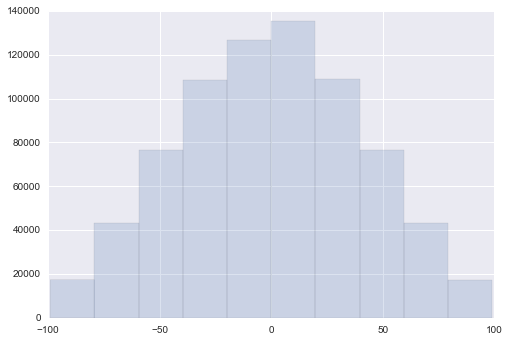

In [6]:
train['hotel_cluster'].diff().hist(alpha=0.2)

In [7]:
train.columns.unique()

array(['Unnamed: 0', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'user_id',
       'is_mobile', 'is_package', 'channel', 'srch_ci', 'srch_co',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking',
       'cnt', 'hotel_continent', 'hotel_country', 'hotel_market',
       'hotel_cluster'], dtype=object)

In [60]:
data = train.drop('Unnamed: 0', axis=1) # Note: zero indexed
data = data.drop('user_id',axis =1)
#data = data.drop('srch_destination_id',axis =1)

In [61]:
data = data.dropna(subset=['srch_ci']) 

In [62]:
data = data[(data['srch_ci'].dt.year <= 2016)]

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752455 entries, 0 to 753405
Data columns (total 23 columns):
date_time                    752455 non-null datetime64[ns]
site_name                    752455 non-null int64
posa_continent               752455 non-null int64
user_location_country        752455 non-null int64
user_location_region         752455 non-null int64
user_location_city           752455 non-null int64
orig_destination_distance    482702 non-null float64
is_mobile                    752455 non-null int64
is_package                   752455 non-null int64
channel                      752455 non-null int64
srch_ci                      752455 non-null datetime64[ns]
srch_co                      752455 non-null datetime64[ns]
srch_adults_cnt              752455 non-null int64
srch_children_cnt            752455 non-null int64
srch_rm_cnt                  752455 non-null int64
srch_destination_id          752455 non-null int64
srch_destination_type_id     752455 non-null

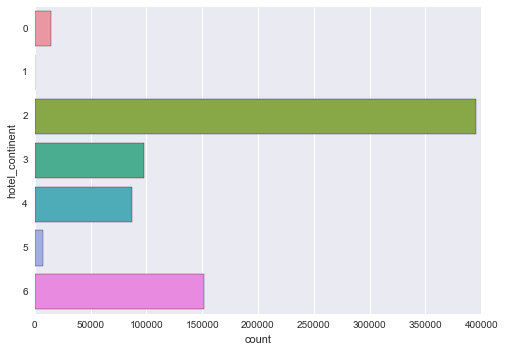

In [8]:
sns.countplot(y='hotel_continent', data=data)

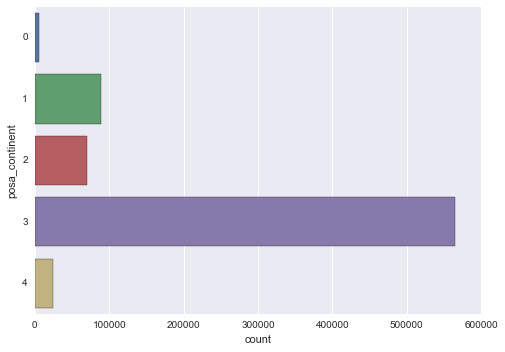

In [13]:
sns.countplot(y='posa_continent', data=data)

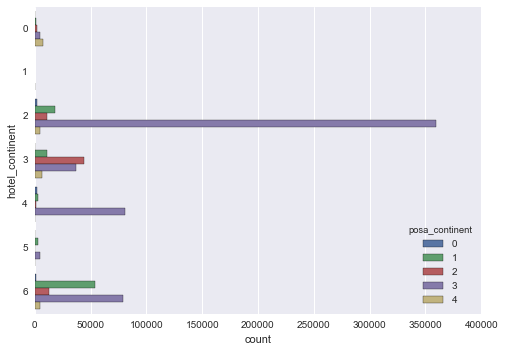

In [14]:
sns.countplot(y='hotel_continent', hue='posa_continent', data=data)

In [64]:
hotel_nights = data['srch_co'] - data['srch_ci']
adv_times = data['date_time']-data['srch_co']
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float)
adv_times = (adv_times / np.timedelta64(1, 'D')).astype(float)

In [16]:
hotel_nights.isnull().any()

False

In [66]:
adv_times.isnull().any()

False

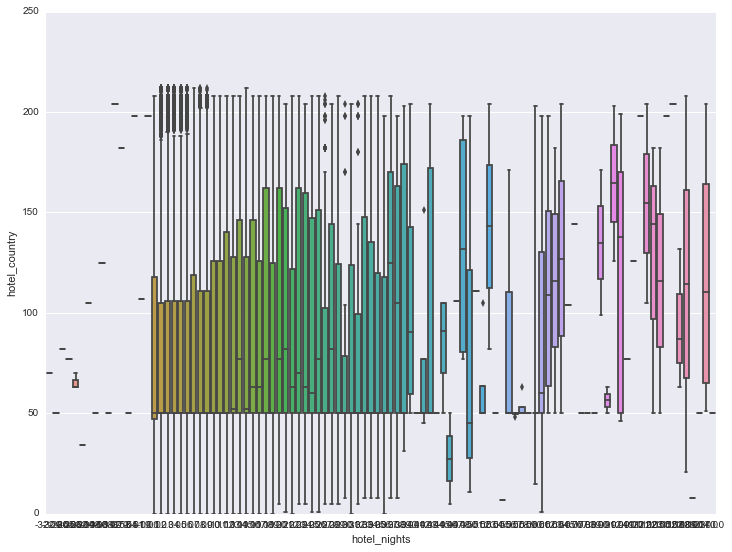

In [67]:
data['hotel_nights'] = hotel_nights
plt.figure(figsize=(12, 9))
sns.boxplot(x='hotel_nights', y='hotel_country', data=data)

In [68]:
data['adv_times'] = adv_times
data['hotel_nights'] = hotel_nights

In [69]:
data.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights,adv_times
0,2014-08-10 13:45:30,2,3,66,348,46035,NaN,1,1,1,...,11334,1,0,2,4,96,201,65,4.0,-73.426736
1,2014-12-02 16:46:50,2,3,66,337,44102,956.5488,0,0,9,...,8268,1,0,1,2,50,682,71,1.0,-79.300810
2,2014-06-17 20:08:47,2,3,66,174,26265,208.5084,0,0,9,...,8250,1,1,1,2,50,628,79,2.0,-20.160567
3,2014-07-09 14:34:55,24,2,3,50,22013,NaN,0,0,5,...,22704,1,0,1,3,104,63,82,2.0,-8.392419
4,2014-11-03 19:57:23,2,3,66,331,23846,412.8715,0,0,2,...,8267,1,0,2,2,50,675,28,6.0,-54.168484


data.to_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/smalltrain.csv')

In [70]:
cor = data.corr()

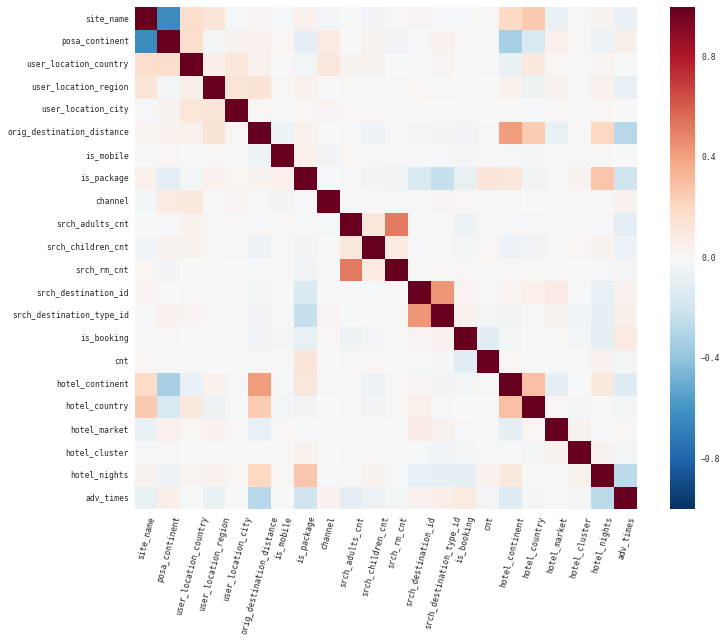

In [71]:
sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
corplt = sns.heatmap(cor,square=True,ax=ax)
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.show()

In [73]:
data1 = data.drop('posa_continent', axis=1)

cor1=data1.corr()

sns.set(context="paper", font="monospace")
f, ax = plt.subplots(figsize=(12, 9))
corplt = sns.heatmap(cor1,square=True,ax=ax)
plt.xticks(rotation=75)
plt.yticks(rotation=0)
plt.show()

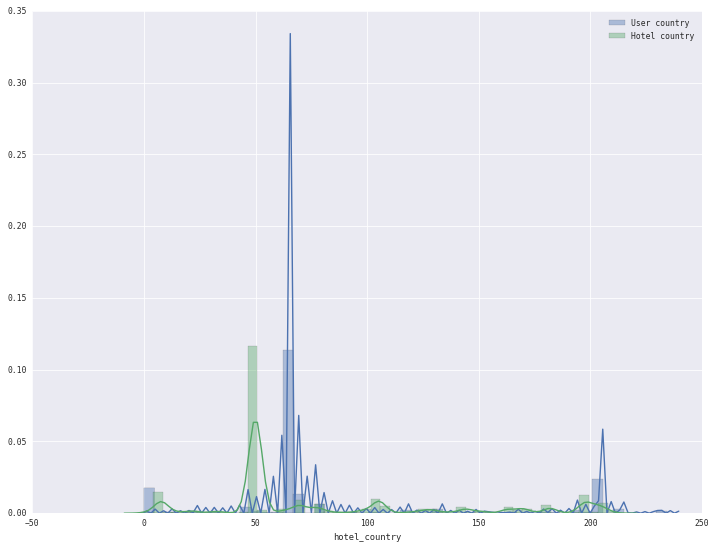

In [74]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data1['user_location_country'], label="User country")
sns.distplot(data1['hotel_country'], label="Hotel country")

plt.legend()

data2 = data1.drop('orig_destination_distance',axis=1)

data2.isnull().any()

data1.to_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/forem.csv')

In [75]:
data2 = data1.drop('srch_co',axis=1)
#data2.to_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/forem.csv')
data2.head()

,date_time,site_name,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_ci,...,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,hotel_nights,adv_times
0,2014-08-10 13:45:30,2,66,348,46035,NaN,1,1,1,2014-10-19,...,11334,1,0,2,4,96,201,65,4.0,-73.426736
1,2014-12-02 16:46:50,2,66,337,44102,956.5488,0,0,9,2015-02-19,...,8268,1,0,1,2,50,682,71,1.0,-79.300810
2,2014-06-17 20:08:47,2,66,174,26265,208.5084,0,0,9,2014-07-06,...,8250,1,1,1,2,50,628,79,2.0,-20.160567
3,2014-07-09 14:34:55,24,3,50,22013,NaN,0,0,5,2014-07-16,...,22704,1,0,1,3,104,63,82,2.0,-8.392419
4,2014-11-03 19:57:23,2,66,331,23846,412.8715,0,0,2,2014-12-22,...,8267,1,0,2,2,50,675,28,6.0,-54.168484


In [76]:
no_null_data = data2.dropna()

no_null_data.to_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/nonulltrain.csv')

import time
import datetime
def dt_to_float(col,fmt):
    newcol=[]
    for t in col:
        t = (t / np.timedelta64(1, 'D')).astype(float)
        newcol.append(t)
#        for x in newcol:
#           col.loc[t=='x',col]= newcol
    return newcol
#no_null_data['date_time'] = no_null_data['date_time'].strftime("%Y-%m-%d %H:%M:%S")
#no_null_data['srch_ci'] = no_null_data['srch_ci'].strftime("%Y-%m-%d")
#no_null_data['srch_co'] = no_null_data['srch_co'].strftime("%Y-%m-%d")

date_str= dt_to_str(no_null_data['date_time'],'%Y-%m-%d %H:%M:%S')

no_null_data.loc[no_null_data['date_time'],'date_time'] = date_str

for x in date_str:
    no_null_data['date_time'].loc[no_null_data['date_time']==x]=x

In [77]:
no_null_data['date_time']=pd.to_numeric(no_null_data['date_time'])
#hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float)
#data2['date_time']=pd.to_numeric(data2['date_time'])

/Users/Shuxian/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
no_null_data['srch_ci']=pd.to_numeric(no_null_data['srch_ci'])
#data2['srch_ci']=pd.to_numeric(data2['srch_ci'])

/Users/Shuxian/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [79]:
#y = no_null_data['hotel_cluster']
#X = no_null_data.drop('hotel_cluster',axis=1)
X = no_null_data.drop('orig_destination_distance',axis=1)
y = no_null_data['orig_destination_distance']

In [18]:
null_data['date_time']=pd.to_numeric(null_data['date_time'])

/Users/Shuxian/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
null_data['srch_ci']=pd.to_numeric(null_data['srch_ci'])

/Users/Shuxian/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
from sklearn import mixture
g = mixture.GMM(n_components=100)

In [81]:
g.fit(X,y)

KeyboardInterrupt: 

In [17]:
null_data = data2[data2['orig_destination_distance'].isnull()]

In [38]:
predict_y=g.predict(null_data.drop('orig_destination_distance',axis=1))

In [43]:
y.mean()

1966.991969448415

In [37]:
predicty.mean()

8.7377415635785329

In [51]:
predict_y

11

In [47]:
g.predict(X).max()

20

In [87]:
no_null_data=no_null_data[['user_location_city','srch_destination_id','orig_destination_distance']]

In [99]:
no_null_data.head()

,user_location_city,srch_destination_id,orig_destination_distance
1,44102,8268,956.5488
2,26265,8250,208.5084
4,23846,8267,412.8715
5,13647,11854,112.9187
7,49272,11929,2416.4157


In [89]:
y = no_null_data['orig_destination_distance']
X = no_null_data[['user_location_city','srch_destination_id']]

In [91]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

In [93]:
X_train = X[:-20]
X_test = X[-20:]

y_train = y[:-20]
y_test = y[-20:]

In [94]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
regr.score(X_test, y_test)

-0.11737568235057939

In [98]:
np.mean((regr.predict(X_test) - y_test) ** 2)

5312352.5868256325

In [100]:
single = pd.read_csv('/Users/Shuxian/Documents/CSYE7390-Spring2016/ADS Final Project/expediaus1.csv')

In [101]:
len(single['hotel_cluster'].unique())

100

In [104]:
len(single[0:10000]['hotel_cluster'].unique())

100

In [105]:
single[0:10000].isnull().any()

Unnamed: 0                   False
date_time                    False
site_name                    False
posa_continent               False
user_location_country        False
user_location_region         False
user_location_city           False
orig_destination_distance     True
user_id                      False
is_mobile                    False
is_package                   False
channel                      False
srch_ci                       True
srch_co                       True
srch_adults_cnt              False
srch_children_cnt            False
srch_rm_cnt                  False
srch_destination_id          False
srch_destination_type_id     False
is_booking                   False
cnt                          False
hotel_continent              False
hotel_country                False
hotel_market                 False
hotel_cluster                False
dtype: bool

In [ ]:
single.drop

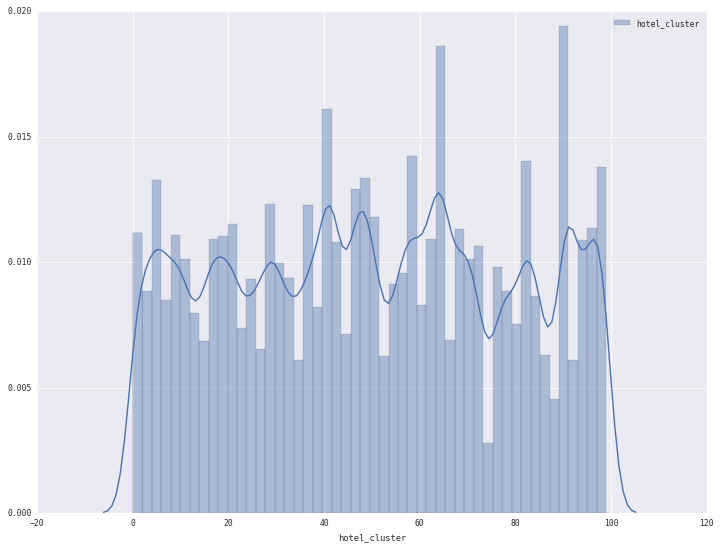

In [106]:
f, ax = plt.subplots(figsize=(12, 9))
sns.distplot(data1['hotel_cluster'], label="hotel_cluster")
plt.legend()